<a href="https://colab.research.google.com/github/ErikFantomex/Metodos-numericos/blob/main/Metodosnumericos_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 1

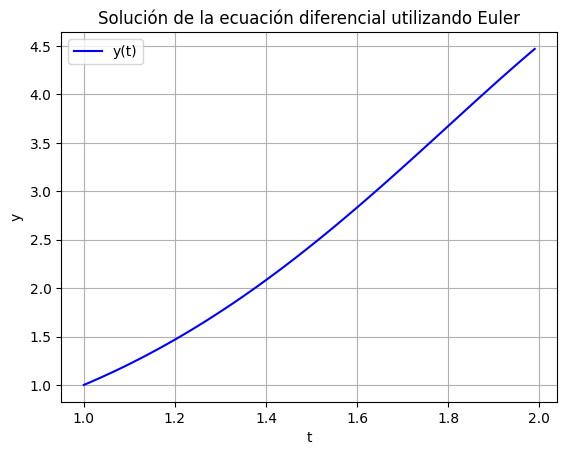

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la ecuación diferencial de primer orden
def f(t, y):
    y0, y1 = y
    return [y1, 2 * y1 - 2 * y0 + np.exp(t) * np.cos(t)]

# Condiciones iniciales
t0 = 1
tf = 2
y0_inicial = 1
y1_inicial = 2

# Tamaño de paso
h = 0.01

# Inicializar listas para almacenar los valores de t y y0
t_values = []
y0_values = []

# Inicializar variables
t = t0
y0 = y0_inicial
y1 = y1_inicial

# Resolver la ecuación diferencial utilizando el método de Euler
while t <= tf:
    t_values.append(t)
    y0_values.append(y0)

    y0_prime, y1_prime = f(t, [y0, y1])

    y0 = y0 + h * y0_prime
    y1 = y1 + h * y1_prime

    t += h

# Graficar la solución
plt.plot(t_values, y0_values, 'b-', label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solución de la ecuación diferencial utilizando Euler')
plt.legend()
plt.grid(True)
plt.savefig('problema1e.png', dpi=600)

plt.show()


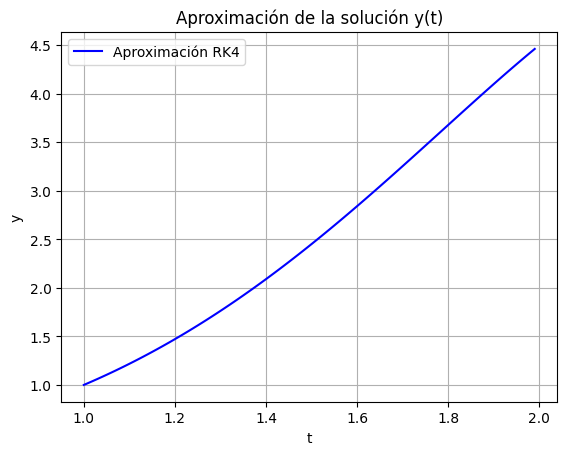

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la ecuación diferencial de primer orden
def f(t, y):
    y0, y1 = y
    return [y1, 2 * y1 - 2 * y0 + np.exp(t) * np.cos(t)]

# Método de RK4
def rk4_method(h, t0, tf, y0_inicial, y1_inicial):
    t_values = []
    y0_values = []

    t = t0
    y0 = y0_inicial
    y1 = y1_inicial

    while t <= tf:
        t_values.append(t)
        y0_values.append(y0)

        k1 = h * f(t, [y0, y1])[0]
        l1 = h * f(t, [y0, y1])[1]

        k2 = h * f(t + h/2, [y0 + k1/2, y1 + l1/2])[0]
        l2 = h * f(t + h/2, [y0 + k1/2, y1 + l1/2])[1]

        k3 = h * f(t + h/2, [y0 + k2/2, y1 + l2/2])[0]
        l3 = h * f(t + h/2, [y0 + k2/2, y1 + l2/2])[1]

        k4 = h * f(t + h, [y0 + k3, y1 + l3])[0]
        l4 = h * f(t + h, [y0 + k3, y1 + l3])[1]

        y0 = y0 + (k1 + 2*k2 + 2*k3 + k4) / 6
        y1 = y1 + (l1 + 2*l2 + 2*l3 + l4) / 6

        t += h

    return t_values, y0_values

# Parámetros del método
h = 0.01
t0 = 1
tf = 2
y0_inicial = 1
y1_inicial = 2

# Aplicar el método de RK4
t_values, y_values = rk4_method(h, t0, tf, y0_inicial, y1_inicial)

# Graficar los resultados
plt.plot(t_values, y_values, 'b-', label='Aproximación RK4')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Aproximación de la solución y(t)')
plt.legend()
plt.grid(True)
plt.savefig('problema1rk4.png', dpi=600)

plt.show()



# Problema 2

# Problema 3

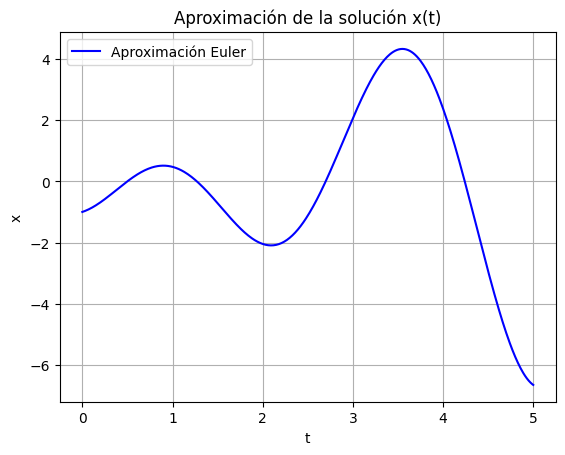

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, x, x_prime):
    return -5 * np.sin(2 * t) + 3 * np.cos(2 * t) - 4 * x

def euler_method(h, t0, tf, x0, x_prime0):
    n = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, n+1)
    x_values = np.zeros(n+1)
    x_prime_values = np.zeros(n+1)
    
    x_values[0] = x0
    x_prime_values[0] = x_prime0
    
    for i in range(1, n+1):
        t = t_values[i]
        x = x_values[i-1]
        x_prime = x_prime_values[i-1]
        
        dx_dt = x_prime
        d2x_dt2 = f(t, x, x_prime)
        
        x_values[i] = x + h * dx_dt
        x_prime_values[i] = x_prime + h * d2x_dt2
    
    return t_values, x_values

# Parámetros del método
h = 0.01
t0 = 0
tf = 5
x0 = -1
x_prime0 = 1

# Aplicar el método de Euler
t_values, x_values = euler_method(h, t0, tf, x0, x_prime0)

# Graficar los resultados
plt.plot(t_values, x_values, 'b-', label='Aproximación Euler')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Aproximación de la solución x(t)')
plt.legend()
plt.grid(True)
plt.savefig('problema3e.png', dpi=600)

plt.show()


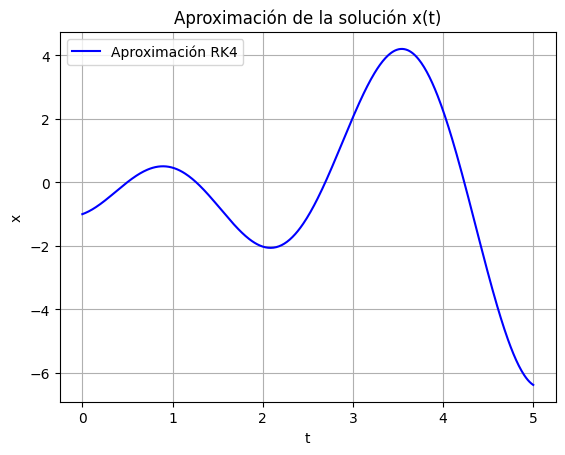

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, x, x_prime):
    return -5 * np.sin(2 * t) + 3 * np.cos(2 * t) - 4 * x

def rk4_method(h, t0, tf, x0, x_prime0):
    n = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, n+1)
    x_values = np.zeros(n+1)
    x_prime_values = np.zeros(n+1)

    x_values[0] = x0
    x_prime_values[0] = x_prime0

    for i in range(n):
        t = t_values[i]
        x = x_values[i]
        x_prime = x_prime_values[i]

        k1_x = h * x_prime
        k1_x_prime = h * f(t, x, x_prime)

        k2_x = h * (x_prime + k1_x_prime/2)
        k2_x_prime = h * f(t + h/2, x + k1_x/2, x_prime + k1_x_prime/2)

        k3_x = h * (x_prime + k2_x_prime/2)
        k3_x_prime = h * f(t + h/2, x + k2_x/2, x_prime + k2_x_prime/2)

        k4_x = h * (x_prime + k3_x_prime)
        k4_x_prime = h * f(t + h, x + k3_x, x_prime + k3_x_prime)

        x_values[i+1] = x + (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6
        x_prime_values[i+1] = x_prime + (k1_x_prime + 2*k2_x_prime + 2*k3_x_prime + k4_x_prime) / 6

    return t_values, x_values

# Parámetros del método
h = 0.01
t0 = 0
tf = 5
x0 = -1
x_prime0 = 1

# Aplicar el método de RK4
t_values, x_values = rk4_method(h, t0, tf, x0, x_prime0)

# Graficar los resultados
plt.plot(t_values, x_values, 'b-', label='Aproximación RK4')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Aproximación de la solución x(t)')
plt.legend()
plt.savefig('problema3rk4.png', dpi=600)

plt.grid(True)


# Problema 4

In [1]:
def f(x, y, z):
    return z

def g(x, y, z):
    return -x * z - y

def rk4_method(h, x0, y0, z0, n):
    x_values = [x0]
    y_values = [y0]
    z_values = [z0]

    for i in range(n):
        x = x_values[-1]
        y = y_values[-1]
        z = z_values[-1]

        k1y = h * f(x, y, z)
        k1z = h * g(x, y, z)
        k2y = h * f(x + h/2, y + k1y/2, z + k1z/2)
        k2z = h * g(x + h/2, y + k1y/2, z + k1z/2)
        k3y = h * f(x + h/2, y + k2y/2, z + k2z/2)
        k3z = h * g(x + h/2, y + k2y/2, z + k2z/2)
        k4y = h * f(x + h, y + k3y, z + k3z)
        k4z = h * g(x + h, y + k3y, z + k3z)

        y_next = y + (k1y + 2*k2y + 2*k3y + k4y) / 6
        z_next = z + (k1z + 2*k2z + 2*k3z + k4z) / 6
        x_next = x + h

        x_values.append(x_next)
        y_values.append(y_next)
        z_values.append(z_next)

    return x_values, y_values

# Parámetros del método
h = 0.1
x0 = 0
y0 = 1
z0 = 2
n = int((1 - x0) / h)

# Aplicar el método de RK4
x_values, y_values = rk4_method(h, x0, y0, z0, n)

# Imprimir los resultados
for i in range(len(x_values)):
    print(f"y({x_values[i]:.1f}) ≈ {y_values[i]:.6f}")


y(0.0) ≈ 1.000000
y(0.1) ≈ 1.194347
y(0.2) ≈ 1.374907
y(0.3) ≈ 1.538316
y(0.4) ≈ 1.681783
y(0.5) ≈ 1.803184
y(0.6) ≈ 1.901124
y(0.7) ≈ 1.974959
y(0.8) ≈ 2.024779
y(0.9) ≈ 2.051361
y(1.0) ≈ 2.056087


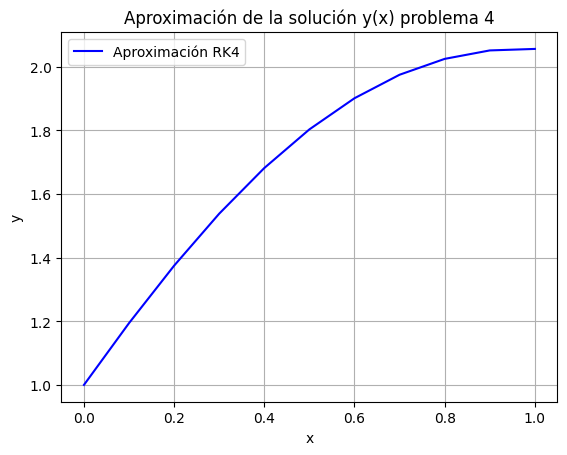

In [4]:
import matplotlib.pyplot as plt

# Graficar los resultados
plt.plot(x_values, y_values, 'b-', label='Aproximación RK4')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Aproximación de la solución y(x) problema 4')
plt.legend()
plt.grid(True)
plt.savefig('problema4.png', dpi=600)
plt.show()
